# 8. Стохастический градиентный спуск SGD и алгоритм SAG

# 9. Пример использования SGD при бинарной классификации образов

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#сигмоиндная функция потерь

def loss(w, x, y):
    M = np.dot(w, x) * y
    return 2 / (1 + np.exp(M))

In [3]:
#производная функция функции потерь по ветору w

def df(w, x, y):
    M = np.dot(w, x) * y
    return -2 * (1 + np.exp(M)) ** (-2) * np.exp(M) * x * y

In [4]:
#обучающая выборка

x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [5]:
n_train = len(x_train)
w = [0.0, 0.0, 0.0]             # начальные весовые коэф-ты
nt = 0.0005                     # шаг сходимости SGD
lm = 0.01                       # скорость забывания для Q
N = 500                         # число итераций ЫПВ

In [6]:
Q = np.mean([loss(x, w, y) for x, y in zip(x_train, y_train)])  # показатель качества
Q_plot = [Q]

In [7]:
for i in range(N):
    k = np.random.randint(0, n_train - 1)           # случайный индекс
    ek = loss(w, x_train[k], y_train[k])            # вычисление потерь для выбранного вектора
    w = w - nt * df(w, x_train[k], y_train[k])      # корректировка весов по SGD
    Q = lm * ek + (1 - lm) * Q                      # пересчет показателя качества
    Q_plot.append(Q)
    
print(w)
print(Q_plot)

[ 0.3318787  -0.15547704  0.00603278]
[1.0, 1.0, 1.0026257771067046, 1.0019603123998637, 0.9973027505572436, 1.0016056407732379, 0.9963369921844499, 1.0025236253504317, 0.9977025528139676, 1.002306615033412, 1.005192513505634, 1.0007495522028942, 1.0040472844025574, 0.9990455065145388, 0.9910618486081225, 0.9971996988166881, 1.000255342216431, 0.9967218686505173, 0.9911438061167003, 0.9963486147062429, 0.9972091203951773, 0.9988808413054371, 0.9987345812806582, 0.9987645738107158, 0.9962515850240482, 0.9942903426262469, 0.9897047790090261, 0.9878688823673593, 0.9846009006014702, 0.9801587173820364, 0.9730171969413315, 0.9796207433174542, 0.9818721482683931, 0.9809350655994568, 0.9760871363881072, 0.9730880064337644, 0.9672817404103423, 0.9615025947375591, 0.9621821760159462, 0.9583427726626454, 0.9559806215180234, 0.9508894852362274, 0.953922600807733, 0.9549799235451966, 0.9538077184439152, 0.9489461575139468, 0.9431191893158017, 0.9370576851442856, 0.9313425271251998, 0.9294621500381

In [8]:
line_x = list(range(max(x_train[:, 0])))  #формирование граифка разделяющей лнии
line_y = [-x * w[0] / w[1] - w[2] for x in line_x]

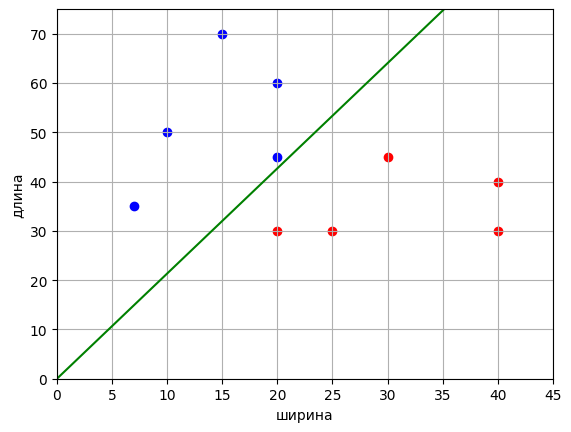

In [9]:
x_0 = x_train[y_train == 1]  # формирование точек для 1-го
x_1 = x_train[y_train == -1]  # и 2-го классов

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')
plt.plot(line_x, line_y, color='green')

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("длина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()